# Laboratorio 3: Análisis Técnico


# Average Directional Index

Desarrollado por J. Welles Wilder en 1978
 
 
 Ecuación:


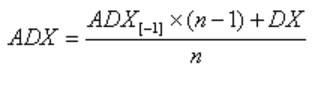



Gráfica en Oanda

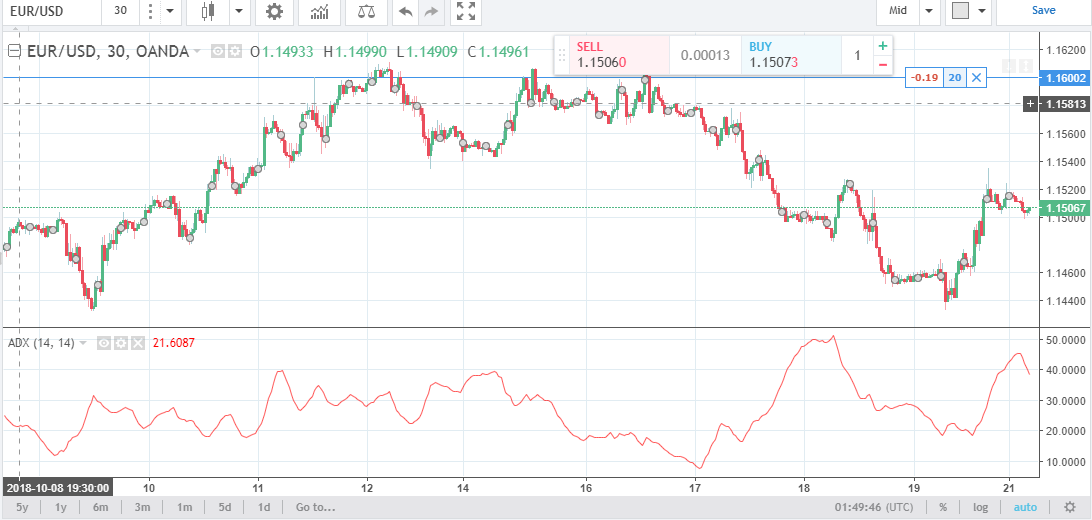

El ADX busca identificar tanto si en un mercado existe o no existe tendencia como la fuerza de la misma. El indicador oscila dentro de un parámetro comprendido entre 0 y 100 y se calcula según las diferencias de las líneas +DI y -DI (directional indicator).

El ADX se calcula partiendo de dos líneas que constituyen su columna vertebral (+DM y -DM) y del True Range.

+	Plus Directional Movement (+DM) intenta determinar la fuerza del movimiento alcista.  Esta línea se calcula de la siguiente forma: si  (máximo actual – máximo anterior) > (mínimo anterior – mínimo actual) entonces el +DM toma el valor (máximo actual – máximo anterior). En caso contrario, el +DM toma el valor cero.
+	Minus Directional Movement (-DM) intenta determinar la fuerza del movimiento bajista.  Esta línea se calcula de la siguiente forma: si  (mínimo anterior – mínimo actual) > (máximo actual – máximo anterior) entonces el -DM toma el valor (mínimo anterior – mínimo actual). En caso contrario, el -DM toma el valor cero.

Una vez se tienen estos valores, el cálculo se obtiene tras realizar los siguientes pasos:

Primero realiza un suavizado de los datos (+DM, -DM y TR) en base a un periodo determinado (Wilder estableció como predeterminado 14). El suavizado, en vez de utilizar una media exponencial (ya que el cálculo lo hacía manualmente), lo realizó a partir de una fórmula que se conoce como media móvil exponencial de Wilder:

+	El primer TR14 es la media simple de los 14 primeros TR, es decir la suma de estos valores dividido entre 14.
+	Los siguientes TR14 = (13 / 14 ) * Anterior TR14  + TR1 actual / 14

Una vez obtenidos el +DM14, -DM14 y TR14 calcula los indicadores direccionales +DI y -DI. Estos indicadores en teoría nos indican la dirección de los movimientos del mercado.

+	+DI14 = +DM14 / TR14
+	-DI14 = -DM14 / TR14

En el siguiente paso calcula el índice direccional (DX) como la diferencia normalizada de los indicadores direccionales obtenidos en el paso anterior:

+	DX = ABS( +DI14 menos -DI14) /  (+DI14 más -DI14)

Finalmente el ADX lo calcula a partir de una media exponencial de Wilder del DX obtenido anteriormente:

+	Primer  ADX14  es la media simple de los 14 primeros DX

+	Siguiente ADX14  = (13 / 14) * Anterior ADX14 + DX actual / 14

El ADX marca la fuerza de la tendencia. Encontramos tres niveles a tener en cuenta: si el ADX se encuentra por debajo de 20 se entiende que no existe tendencia. Entre 20 y 25 encontramos una zona de indefinición donde se entendería que la tendencia es muy débil y las señales no deberían tenerse en cuenta. El mercado estará en tendencia por encima de 25 y por encima de 40 se considera que la tendencia es muy fuerte.

Las líneas +DI y -DI determinarán la dirección del movimiento del mercado. El movimiento será al alza cuando la línea +DI se encuentre sobre la línea -DI, mientras que el movimiento será a la baja cuando se produce la situación opuesta.

El cruce de +DI sobre -DI determina una señal de compra, mientras que el cruce de -DI sobre +DI marca un punto de venta. Si tenemos en cuenta la fuerza de la tendencia marcada por el ADX, los cruces de las líneas +DI y -DI sólo deberían tenerse en cuenta cuando la tendencia sea suficientemente fuerte. Se considera que un ADX por encima de 25 es suficiente para tener en cuenta estas señales, mientras que por debajo de 20 los movimientos que se producen son de corto recorrido.


Gráficas donde se cumple la regla de trading:

En las siguientes gráficas podemos observar dos puntos en los que el ADX supera el 40 donde ya es considerado una tendencia fuerte.  

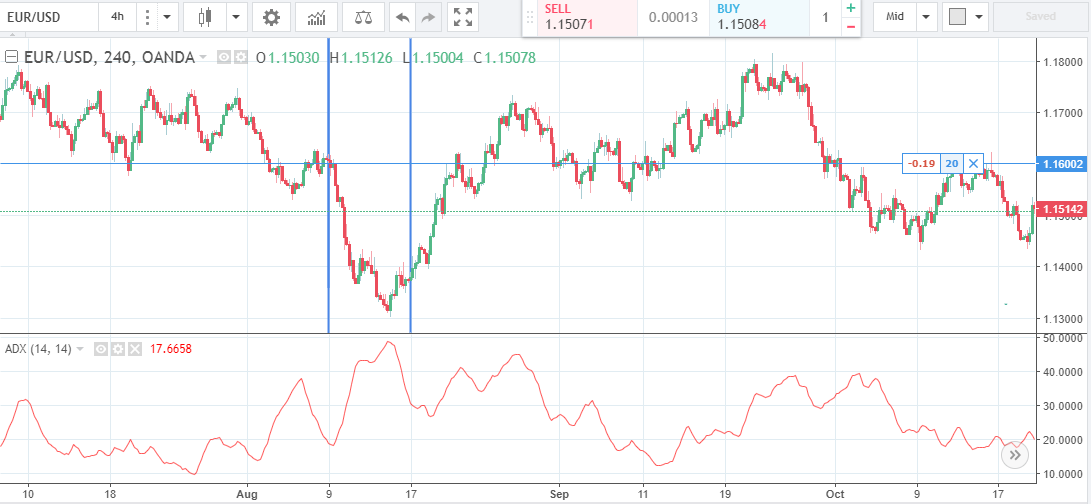

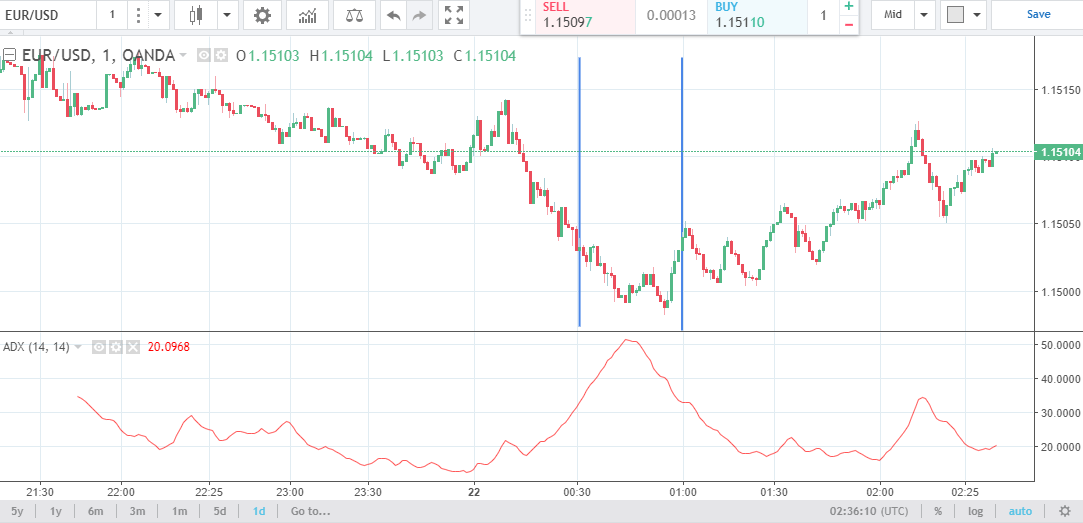

# Código

In [ ]:
# -- Borrar todos los elementos del environment
rm(list=ls())
mdir <- getwd()

# -- Establecer el sistema de medicion de la computadora
Sys.setlocale(category = "LC_ALL", locale = "")

# -- Huso horario
Sys.setenv(tz="America/Monterrey", TZ="America/Monterrey")
options(tz="America/Monterrey", TZ="America/Monterrey")

# -- Cargar y/o instalar en automatico paquetes a utilizar -- #

pkg <- c("base","downloader","dplyr","fBasics","forecast","grid",
         "gridExtra","httr","jsonlite","lmtest","lubridate","moments",
         "matrixStats", "PerformanceAnalytics","plyr","quantmod",
         "reshape2","RCurl","RMySQL", "stats","scales","tseries",
         "TTR","TSA","XML","xts","zoo")

inst <- pkg %in% installed.packages()
if(length(pkg[!inst]) > 0) install.packages(pkg[!inst])
instpackages <- lapply(pkg, library, character.only=TRUE)

# -- Cargar archivos desde GitHub -- #

RawGitHub <- "https://raw.githubusercontent.com/IFFranciscoME/"
ROandaAPI <- paste(RawGitHub,"ROandaAPI/master/ROandaAPI.R",sep="")
downloader::source_url(ROandaAPI,prompt=FALSE,quiet=TRUE)

# -- Parametros para usar API-OANDA

# Tipo de cuenta practice/live
OA_At <- "practice"
# ID de cuenta
OA_Ai <- 1742531
# Token para llamadas a API
OA_Ak <- "ada4a61b0d5bc0e5939365e01450b614-4121f84f01ad78942c46fc3ac777baa6" 
# Hora a la que se considera "Fin del dia"
OA_Da <- 17
# Uso horario
OA_Ta <- "America/Mexico_City"
# Instrumento
OA_In <- "EUR_USD"
# Granularidad o periodicidad de los precios H4 = Cada 4 horas
OA_Pr <- "H4"
# Multiplicador de precios para convertir a PIPS
MultPip_MT1 <- 10000

Precios_Oanda <- HisPrices(AccountType = OA_At, Granularity = OA_Pr,
                           DayAlign = OA_Da, TimeAlign = OA_Ta, Token = OA_Ak,
                           Instrument = OA_In, 
                           Start = NULL, End = NULL, Count = 900)

###############

Fadx <- ADX(Precios_Oanda[,c("High","Low","Close")])


###############

Historico <- data.frame("Date"= Precios_Oanda[,1],
                        "PrecioC"= Precios_Oanda[,5],
                        "PrecioA"= Precios_Oanda[,2],
                        "ADX"= Fadx,
                        "R_Precio" = 0,
                        "R_Activo" = 0,
                        "R_Cuenta" = 0,
                        "Capital" = 0,"Flotante" = 0, "Balance" = 0, "Unidades" = 0,
                        "Unidades_a" = 0,
                        "Ganancia"= 0, "Ganancia_ac"= 0, "Mensaje"= NA)

#####
PIP <- 10000
Capital_inicial <- 1000000
#####

#Calcular los titulos de posicion inicial
Historico$Unidades[28] <- PIP

#Calcular los titulos acumulados
Historico$Unidades_a[28] <- Historico$Unidades[28]

#Calcular Ganancia
Historico$Ganancia[28]<- (Historico$PrecioC[28]-Historico$PrecioA[28])*PIP

#Ganancia Acumulada
Historico$Ganancia_ac[28]<- Historico$Ganancia[28]
Historico$Flotante[28]<- Historico$Unidades_a[28]*Historico$PrecioC[28]

#Todo remanente se deja registrado en la cuenta de efectivo
Historico$Capital[28] <- Capital_inicial-Historico$Flotante[28]

#Calcular Balance
Historico$Balance[28] <- Historico$Flotante[28]+ Historico$Capital[28]

#Calcular R_Precio
Historico$R_Precio <- round(c(0, diff(log(Historico$PrecioC))),4)
##########################

for(i in 29:length(Historico$Date)){
  if(Historico$ADX.ADX[i]>25){
    
    if(Historico$ADX.DIp[i] > Historico$ADX.DIn[i]){
    
    Historico$Unidades[i] <- PIP
    
    Historico$Unidades_a[i] <- Historico$Unidades_a[i-1]+Historico$Unidades[i]
    
    Historico$Flotante[i]<- Historico$PrecioC[i]*Historico$Unidades_a[i]
    
    Historico$Ganancia[i]<-(Historico$PrecioC[i]-Historico$PrecioA[i])*Historico$Unidades[i]
    Historico$Ganancia_ac[i]<- Historico$Ganancia[i]+Historico$Ganancia_ac[i-1]
    Historico$Mensaje[i] <- "Compra"
    
  }
    if(Historico$ADX.DIp[i] < Historico$ADX.DIn[i]){
    
      Historico$Unidades[i]   <- PIP
    
    Historico$Unidades_a[i] <- Historico$Unidades_a[i-1]+Historico$Unidades[i]
    
    Historico$Flotante[i]<- Historico$PrecioC[i]*Historico$Unidades_a[i]
    
    Historico$Ganancia[i]<-(Historico$PrecioA[i]-Historico$PrecioC[i])*Historico$Unidades[i]
    Historico$Ganancia_ac[i]<- Historico$Ganancia[i]+Historico$Ganancia_ac[i-1]
    Historico$Mensaje[i] <- "Venta"
}
  }
  else { # Sin senal
    Historico$Mensaje[i] <- "No hay señal"
    Historico$Unidades [i] <- 0
    Historico$Unidades_a[i] <- Historico$Unidades_a[i-1]+Historico$Unidades[i]
    Historico$Flotante[i] <- Historico$PrecioC[i]*Historico$Unidades_a[i]
    Historico$Ganancia[i]<-(Historico$PrecioA[i]-Historico$PrecioC[i])*Historico$Unidades[i]
    Historico$Ganancia_ac[i]<- Historico$Ganancia[i]+Historico$Ganancia_ac[i-1]
  }
}

###########################
plot_ly(x = Historico[,1], type="candlestick", open = Historico$PrecioA, close=Historico$PrecioC, high = Precios_Oanda$High, low=Precios_Oanda$Low) %>%
  layout(tittle = "Basic Candlestick Chart")

plot_ly(x = Historico[,1], y = Historico[,4], type = 'scatter', mode = 'lines', name = 'ADX',
        
        line = list(color = 'blue'), hoverinfo = "text", text = ~paste('ADX', Historico[,4]))  %>%
  
  layout(title = "ADX vs Precio de cierre",
         
         xaxis = list(title = "Fechas", showgrid = T),
         
         yaxis = list(title = "Precios"), 
         
         legend = list(orientation = 'h', y = -0.25, x = 0.5))    